In [0]:
from google.colab import drive

In [0]:
#drive.mount("/content/drive")

In [0]:
!unzip "drive/My Drive/deeplearning/dogs-vs-cats.zip"
src_file_zip = "drive/My Drive/deeplearning/dogs-vs-cats.zip"

Archive:  drive/My Drive/deeplearning/dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [0]:
!unzip train.zip
#!mkdir src_data

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       
  inflating: train/dog.5520.jpg      

In [0]:
!mv train src_data

mv: cannot move 'train' to 'src_data/train': Directory not empty


In [0]:
!ls src_data

train


In [0]:
src_data_loc = "src_data/train"

In [0]:
import os

In [0]:
def createpath(pathname):
  if os.path.exists(pathname):
    print("Path already exists")
  else:
    os.mkdir(pathname)
    print("Created!")

In [0]:
model_str_path = "drive/My Drive/deeplearning"

In [0]:
validation_dir = "src_data/validation"
createpath(validation_dir)

Created!


In [0]:
test_dir = "src_data/test"
createpath(test_dir)

Created!


In [0]:
train_sub_dir = "src_data/sub_train"
createpath(train_sub_dir)

Created!


In [0]:
sub_train_cats_dir = "src_data/sub_train/cats"
createpath(sub_train_cats_dir)

Created!


In [0]:
sub_train_dogs_dir = "src_data/sub_train/dogs"
createpath(sub_train_dogs_dir)

Created!


In [0]:
validation_cat_dir = "src_data/validation/cats"
createpath(validation_cat_dir)
validation_dog_dir = "src_data/validation/dogs"
createpath(validation_dog_dir)

Created!
Created!


In [0]:
#sub train cats
import shutil
fnames = ["cat.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(src_data_loc, fname)
  des = os.path.join(sub_train_cats_dir, fname)
  shutil.copyfile(src, des)

In [0]:
#sub train dogs
fnames = ["dog.{}.jpg".format(i) for i in range(1000)]
for fname in fnames :
  src = os.path.join(src_data_loc, fname)
  des = os.path.join(sub_train_dogs_dir, fname)
  shutil.copyfile(src,des)

In [0]:
#validation cats
fnames = ["cat.{}.jpg".format(i) for i in range(1000,1500)]
for fname in fnames :
  src = os.path.join(src_data_loc, fname)
  des = os.path.join(validation_cat_dir, fname)
  shutil.copyfile(src,des)

In [0]:
#validation dogs
fnames = ["dog.{}.jpg".format(i) for i in range(1000,1500)]
for fname in fnames :
  src = os.path.join(src_data_loc, fname)
  des = os.path.join(validation_dog_dir, fname)
  shutil.copyfile(src,des)

In [0]:
print(len(os.listdir(test_dir)))
print(len(os.listdir(sub_train_cats_dir)))
print(len(os.listdir(sub_train_dogs_dir)))
print(len(os.listdir(validation_cat_dir)))
print(len(os.listdir(validation_dog_dir)))

500
1000
1000
500
500


In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras import models, layers, optimizers

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (150,150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [0]:
from tensorflow.keras import optimizers

In [0]:
model.compile(loss = "binary_crossentropy", optimizer = optimizers.RMSprop(), metrics = ['acc'])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(
    train_sub_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = "binary"
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = "binary"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
for data, label in train_generator:
  print("Data shape: ", data.shape)
  print("label shape: ", label.shape)
  print("Label[0]: ", label[0])
  break

Data shape:  (20, 150, 150, 3)
label shape:  (20,)
Label[0]:  1.0


In [0]:
import pickle 

In [0]:
def savedata(model, history, iteration):
  model_file = storagepath + "cats_dogs_sub_model" + str(iteration).strip() + ".h5"
  history_file = storagepath + "cats_dogs_sub_history" + str(iteration).strip() + ".pkle"
  model.save(model_file)
  with open(history_file, "wb") as fp:
    pickle.dump(history.history, fp)
  return model_file, history_file

In [0]:
def loaddata(iteration):
  model_file = storagepath + "cats_dogs_sub_model" + str(iteration).strip() + ".h5"
  history_file = storagepath + "cats_dogs_sub_history" + str(iteration).strip() + ".pkle"
  model = models.load_model(model_file)
  with open(history_file, "rb") as fp:
    history = pickle.load(fp)
  return model, history

In [0]:
storagepath = "drive/My Drive/deeplearning/"

In [0]:
history = model.fit(
    train_generator,
    steps_per_epoch = 70,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 30

)
model_file, history_file = savedata(model, history, iteration = 1)
print(model_file, history_file, "saved!")

Epoch 1/30
70/70 [==============================] - 8s 112ms/step - loss: 6.7495e-11 - acc: 1.0000 - val_loss: 11.9024 - val_acc: 0.7233
Epoch 2/30
70/70 [==============================] - 8s 112ms/step - loss: 7.4781e-11 - acc: 1.0000 - val_loss: 10.9520 - val_acc: 0.7333
Epoch 3/30
70/70 [==============================] - 8s 113ms/step - loss: 7.8886e-11 - acc: 1.0000 - val_loss: 11.5463 - val_acc: 0.7267
Epoch 4/30
70/70 [==============================] - 8s 110ms/step - loss: 7.2359e-11 - acc: 1.0000 - val_loss: 10.6499 - val_acc: 0.7217
Epoch 5/30
70/70 [==============================] - 8s 111ms/step - loss: 5.0154e-11 - acc: 1.0000 - val_loss: 12.9517 - val_acc: 0.7267
Epoch 6/30
70/70 [==============================] - 8s 112ms/step - loss: 1.4474e-10 - acc: 1.0000 - val_loss: 11.9047 - val_acc: 0.7200
Epoch 7/30
70/70 [==============================] - 8s 111ms/step - loss: 2.6047e-11 - acc: 1.0000 - val_loss: 12.8237 - val_acc: 0.7117
Epoch 8/30
70/70 [=======================

In [0]:
model, history = loaddata(iteration = 1)

In [0]:
import matplotlib.pyplot as plt

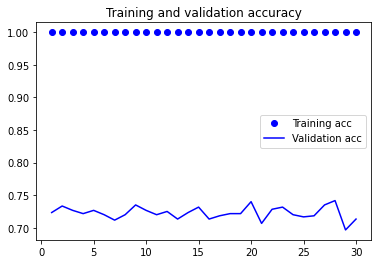

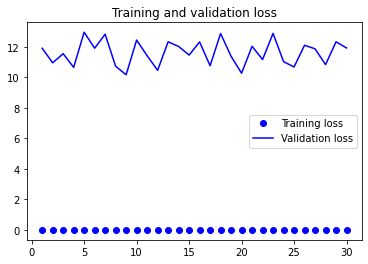

In [0]:
history = history
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest"
)

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

model.compile(
    loss = "binary_crossentropy",
    optimizer = optimizers.RMSprop(),
    metrics = ['acc']

)

In [0]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    horizontal_flip = True,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
)
train_generator = train_datagen.flow_from_directory(
    train_sub_dir,
    batch_size = 20,
    target_size = (150,150),
    class_mode = "binary"
)
val_datagen = ImageDataGenerator(rescale = 1./255)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    batch_size = 20,
    class_mode = "binary",
    target_size = (150,150)
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
history  = model.fit(
    train_generator, epochs = 100, steps_per_epoch = 100, validation_data = val_generator, validation_steps = 50
)


Epoch 1/100
100/100 [==============================] - 16s 161ms/step - loss: 0.7453 - acc: 0.5155 - val_loss: 0.6893 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 16s 163ms/step - loss: 0.6955 - acc: 0.5215 - val_loss: 0.6918 - val_acc: 0.5030
Epoch 3/100
100/100 [==============================] - 16s 162ms/step - loss: 0.6894 - acc: 0.5645 - val_loss: 0.7668 - val_acc: 0.4930
Epoch 4/100
100/100 [==============================] - 16s 160ms/step - loss: 0.6736 - acc: 0.5895 - val_loss: 0.6292 - val_acc: 0.6580
Epoch 5/100
100/100 [==============================] - 16s 159ms/step - loss: 0.6684 - acc: 0.6300 - val_loss: 0.6405 - val_acc: 0.6020
Epoch 6/100
100/100 [==============================] - 16s 160ms/step - loss: 0.6484 - acc: 0.6475 - val_loss: 0.6350 - val_acc: 0.6360
Epoch 7/100
100/100 [==============================] - 16s 160ms/step - loss: 0.6203 - acc: 0.6650 - val_loss: 0.6948 - val_acc: 0.6070
Epoch 8/100
100/100 [===========================

In [0]:
savedata(model, history, 2)
print(model, history,"saved!")

<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f352ec3d470> <tensorflow.python.keras.callbacks.History object at 0x7f352ef4d198> saved!


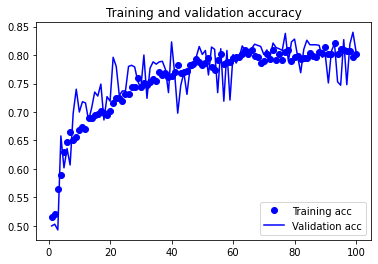

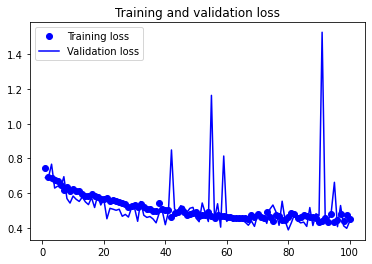

In [0]:
history = history.history
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
train_main_dir = "src_data/train"
test_cats = "src_data/test/cats"
createpath(test_cats)
test_dogs = "src_data/test/dogs"
createpath(test_dogs)
fnames = ["cat.{}.jpg". format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(train_main_dir, fname)
  des = os.path.join(test_cats, fname)
  shutil.copyfile(src,des)
fnames = ["dog.{}.jpg". format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(train_main_dir, fname)
  des = os.path.join(test_dogs, fname)
  shutil.copyfile(src,des) 

Path already exists
Path already exists


In [0]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = "binary"
)

Found 1000 images belonging to 2 classes.


In [0]:
model.evaluate(test_generator, steps = 70)

70/70 [==============================] - 4s 51ms/step - loss: 0.4849 - acc: 0.7993


[0.48489874601364136, 0.7992857098579407]

In [0]:
model.evaluate(test_generator, steps = 512)

512/512 [==============================] - 26s 51ms/step - loss: 0.4782 - acc: 0.8057


[0.47818636894226074, 0.8056640625]